In [1]:
from src.tools import Observation
import os
import pandas as pd
import numpy as np
from astropy.time import Time
import astropy.units as u
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

c:\Users\maria\Desktop\CubeSats\grbalpha-tools\src\tools.py:184: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  df_t90 = pd.DataFrame(c_event,index=utc_event,columns=['c_event']).resample('1s',loffset=pd.Timedelta(value=self.exp_time/2,unit='second')).ffill()
c:\Users\maria\Desktop\CubeSats\grbalpha-tools\src\tools.py:184: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  df_t90 = pd.DataFrame(c_event,index=utc_event,columns=['c_event']).resample('1s',loffset=pd.Timedelta(value=self.exp_time/2,unit='second')).ffill()
c:\Users\maria\Deskt

statistics in 70-370 keV for a GRB_Fermi at 2023-01-02 00:22:12.967000:
peak time [utc]: 2023-01-02 00:22:13.007242
SNR at peak: 5.558
count rate [cnt/s] above background at peak: 73.318 +- 13.191
T90 [s]: 1
SNR in T90: 3.959
counts above background in T90: 77.081 +- 19.468

statistics in 70-890 keV for a GRB_Fermi at 2023-01-02 00:22:12.967000:
peak time [utc]: 2023-01-02 00:22:13.007242
SNR at peak: 5.592
count rate [cnt/s] above background at peak: 78.494 +- 14.036
T90 [s]: 1
SNR in T90: 3.819
counts above background in T90: 79.651 +- 20.857



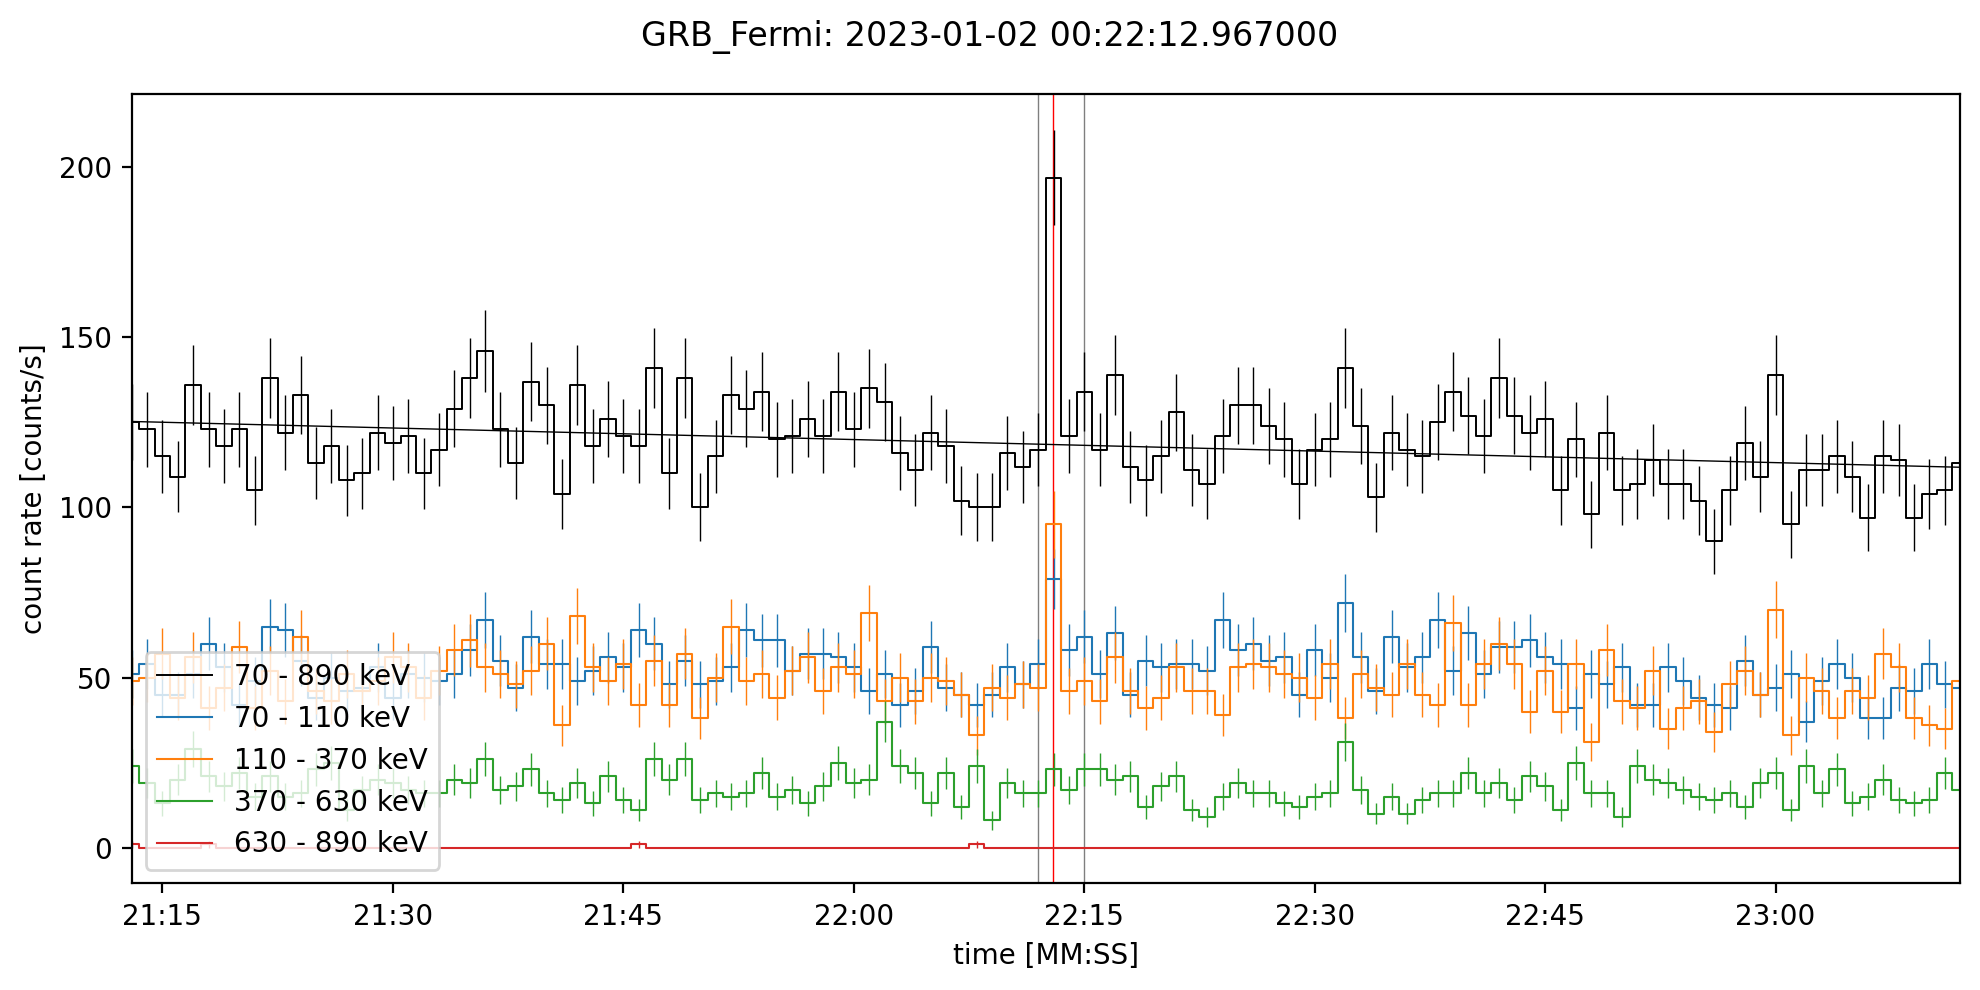

In [68]:
df = pd.read_csv(r"C:\Users\maria\Desktop\CubeSats\trigger_file_list.csv")
path = r"C:\\Users\\maria\\Desktop\\CubeSats\\GRBs\\files\\"
n = 15
time,mission,filename,ra,dec = df.time[n],df.mission[n],df.filename[n],df.ra[n],df.dec[n]
obs = Observation(path+filename)
obs.check_event(time,'GRB_'+mission,llim=59,rlim=62,dtvalue_left=1,dtvalue_right=1,fit_function='linear')#,second_locator=[0])
# obs.plot_skymap(time,'GRB_'+mission,ra,dec)

In [ ]:
for file in os.listdir(r"C:\Users\maria\Desktop\CubeSats\GRBs\files"):
    if file == 'test.json':
        continue
    else:
        obs = Observation(r"C:\\Users\\maria\\Desktop\\CubeSats\\GRBs\\files\\"+file)
        # grb = obs.is_GRB_in_file()
        # print(f"{file}:\n GRBs: {grb}")
        sgr = obs.is_SGR_in_file(path=r'C:\Users\maria\Desktop\CubeSats\SGRJ1806-20_list.txt')
        # sf = obs.is_SF_in_file()
        print(f"{file}:\n SGR:\n {sgr}")# \n SF:\n {sf}")

c:\Users\maria\Desktop\CubeSats\grbalpha-tools\src\tools.py:187: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  df_t90 = pd.DataFrame(c_event,index=utc_event,columns=['c_event']).resample('1s',loffset=pd.Timedelta(value=self.exp_time/2,unit='second')).ffill()
c:\Users\maria\Desktop\CubeSats\grbalpha-tools\src\tools.py:187: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  df_t90 = pd.DataFrame(c_event,index=utc_event,columns=['c_event']).resample('1s',loffset=pd.Timedelta(value=self.exp_time/2,unit='second')).ffill()


statistics in 70-370 keV for a GRB at 2023-02-04 21:44:27.200000:
peak time [utc]: 2023-02-04 21:47:02.876594
SNR at peak: 8.636
count rate [cnt/s] above background at peak: 138.17 +- 16.0
T90 [s]: 214
SNR in T90: 24.617
counts above background in T90: 4279.1 +- 173.83

statistics in 70-890 keV for a GRB at 2023-02-04 21:44:27.200000:
peak time [utc]: 2023-02-04 21:47:02.876594
SNR at peak: 8.489
count rate [cnt/s] above background at peak: 147.522 +- 17.378
T90 [s]: 208
SNR in T90: 19.737
counts above background in T90: 3857.933 +- 195.469



c:\Users\maria\Desktop\CubeSats\grbalpha-tools\src\tools.py:276: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


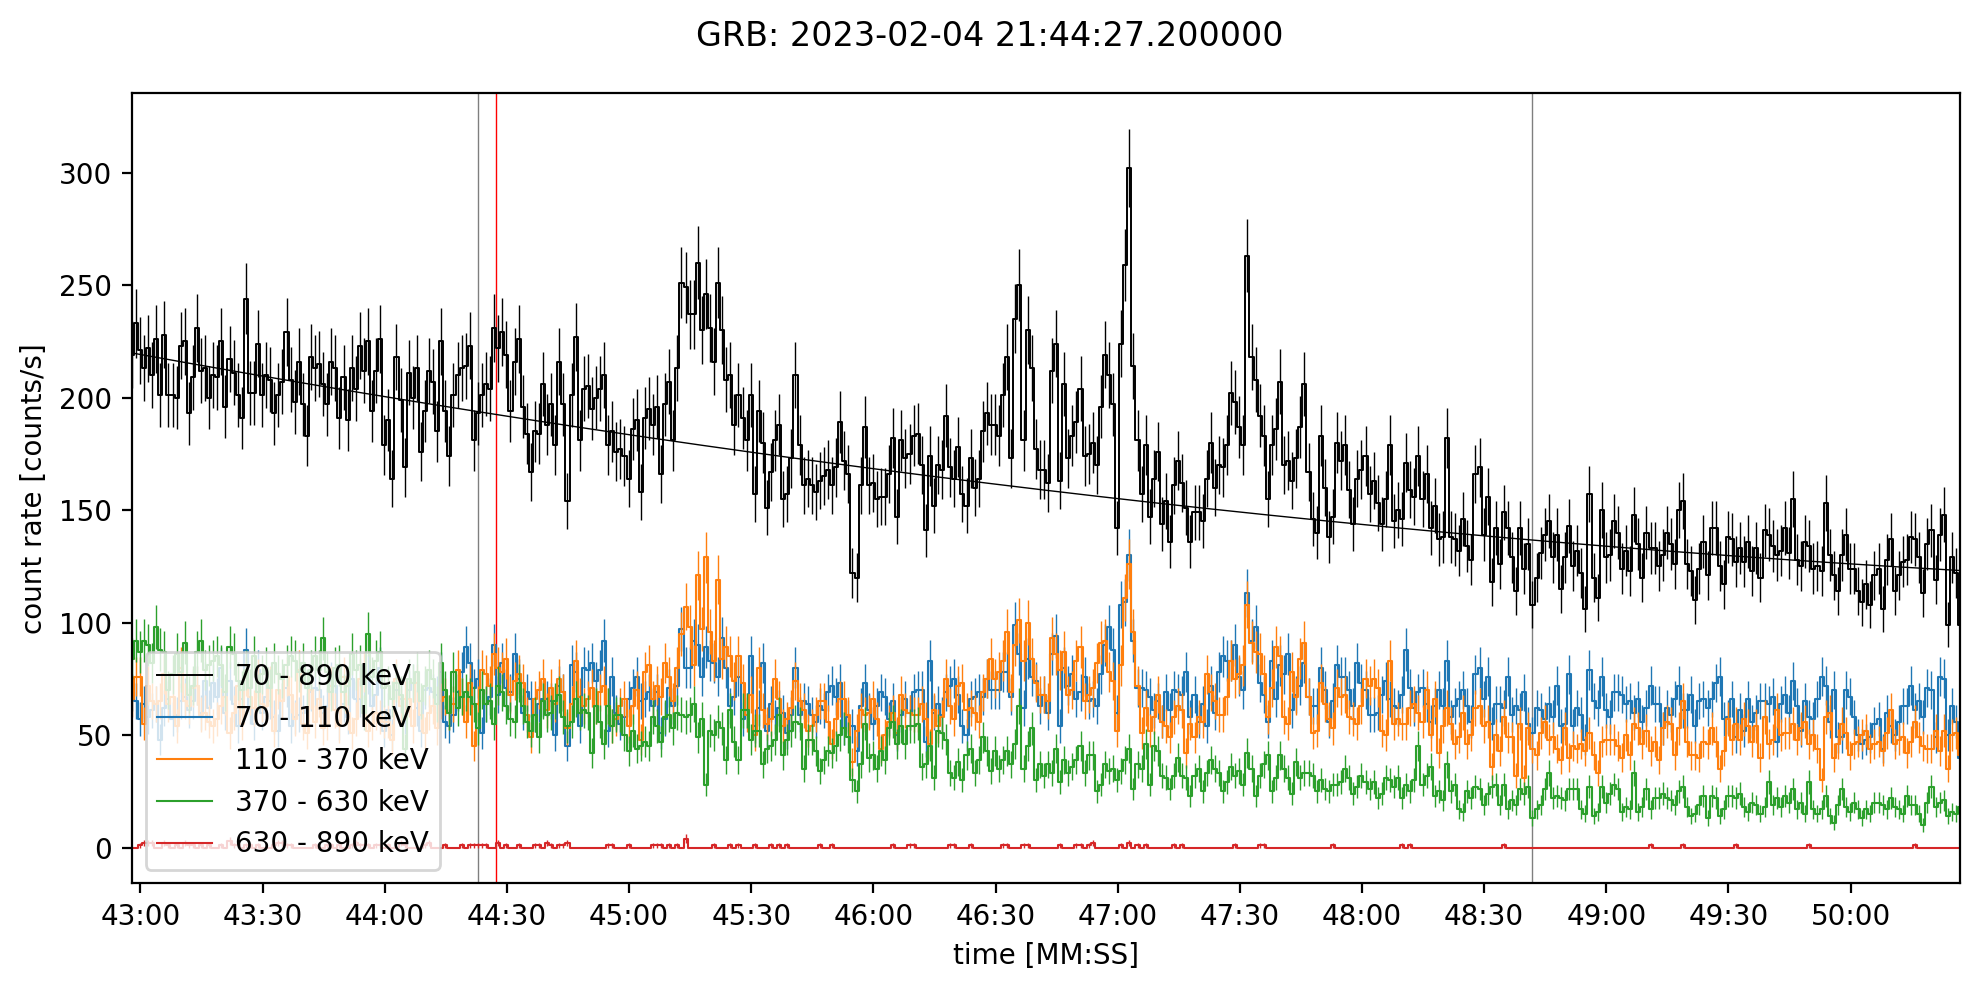

In [4]:
path = r"C:\Users\maria\Desktop\CubeSats\GRBs\files\r23b04b_267000.json"
time = '2023-02-04 21:44:27.200'

event_type = 'GRB'

obs = Observation(path)
obs.check_event(time,event_type,llim=84,rlim=344,dtvalue_left=1.5,dtvalue_right=6,second_locator=[0,30],fit_function='polynom')
# ra = 59.240	
# dec = 51.700		
# obs.plot_skymap(time,event_type,ra,dec)

In [4]:
time = '2023-02-16 14:49:30'
obs.longitude[time],obs.latitude[time]

(utc
 2023-02-16 14:49:30.877    290.112
 Name: lon, dtype: float64,
 utc
 2023-02-16 14:49:30.877    47.9406
 Name: lat, dtype: float64)

In [88]:
obs.longitude['2022-11-11 11:42:29'],obs.latitude['2022-11-11 11:42:29']

(utc
 2022-11-11 11:42:29.186    20.553
 Name: lon, dtype: float64,
 utc
 2022-11-11 11:42:29.186   -77.055
 Name: lat, dtype: float64)

In [21]:
obs = Observation(r'C:\Users\maria\Desktop\CubeSats\GRBs\files\r23b07a_111616.json')
ncols = len(obs.data.columns)

In [52]:
trig_time = '2023-02-07 04:40:45.260'
start_time = '2023-02-07 04:40:05'
end_time = '2023-02-07 04:41:45'

In [34]:
integral = pd.read_csv(r'C:\Users\maria\Desktop\CubeSats\GRBs\integral-spiacs-grb230207b.csv')
integral['time'] = [pd.Timestamp('2023-02-07 04:40:45') + pd.Timedelta(t,unit='s') for t in integral['timestamp']]
integral

,timestamp,data,time
0,-29.988,4800.0,2023-02-07 04:40:15.012
1,-29.938,4772.0,2023-02-07 04:40:15.062
2,-29.888,4812.0,2023-02-07 04:40:15.112
3,-29.838,4646.0,2023-02-07 04:40:15.162
4,-29.788,4690.0,2023-02-07 04:40:15.212
...,...,...,...
1195,29.762,4846.0,2023-02-07 04:41:14.762
1196,29.812,4700.0,2023-02-07 04:41:14.812
1197,29.862,4700.0,2023-02-07 04:41:14.862
1198,29.912,4688.0,2023-02-07 04:41:14.912


C:\Users\maria\AppData\Local\Temp\ipykernel_11760\2179950984.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


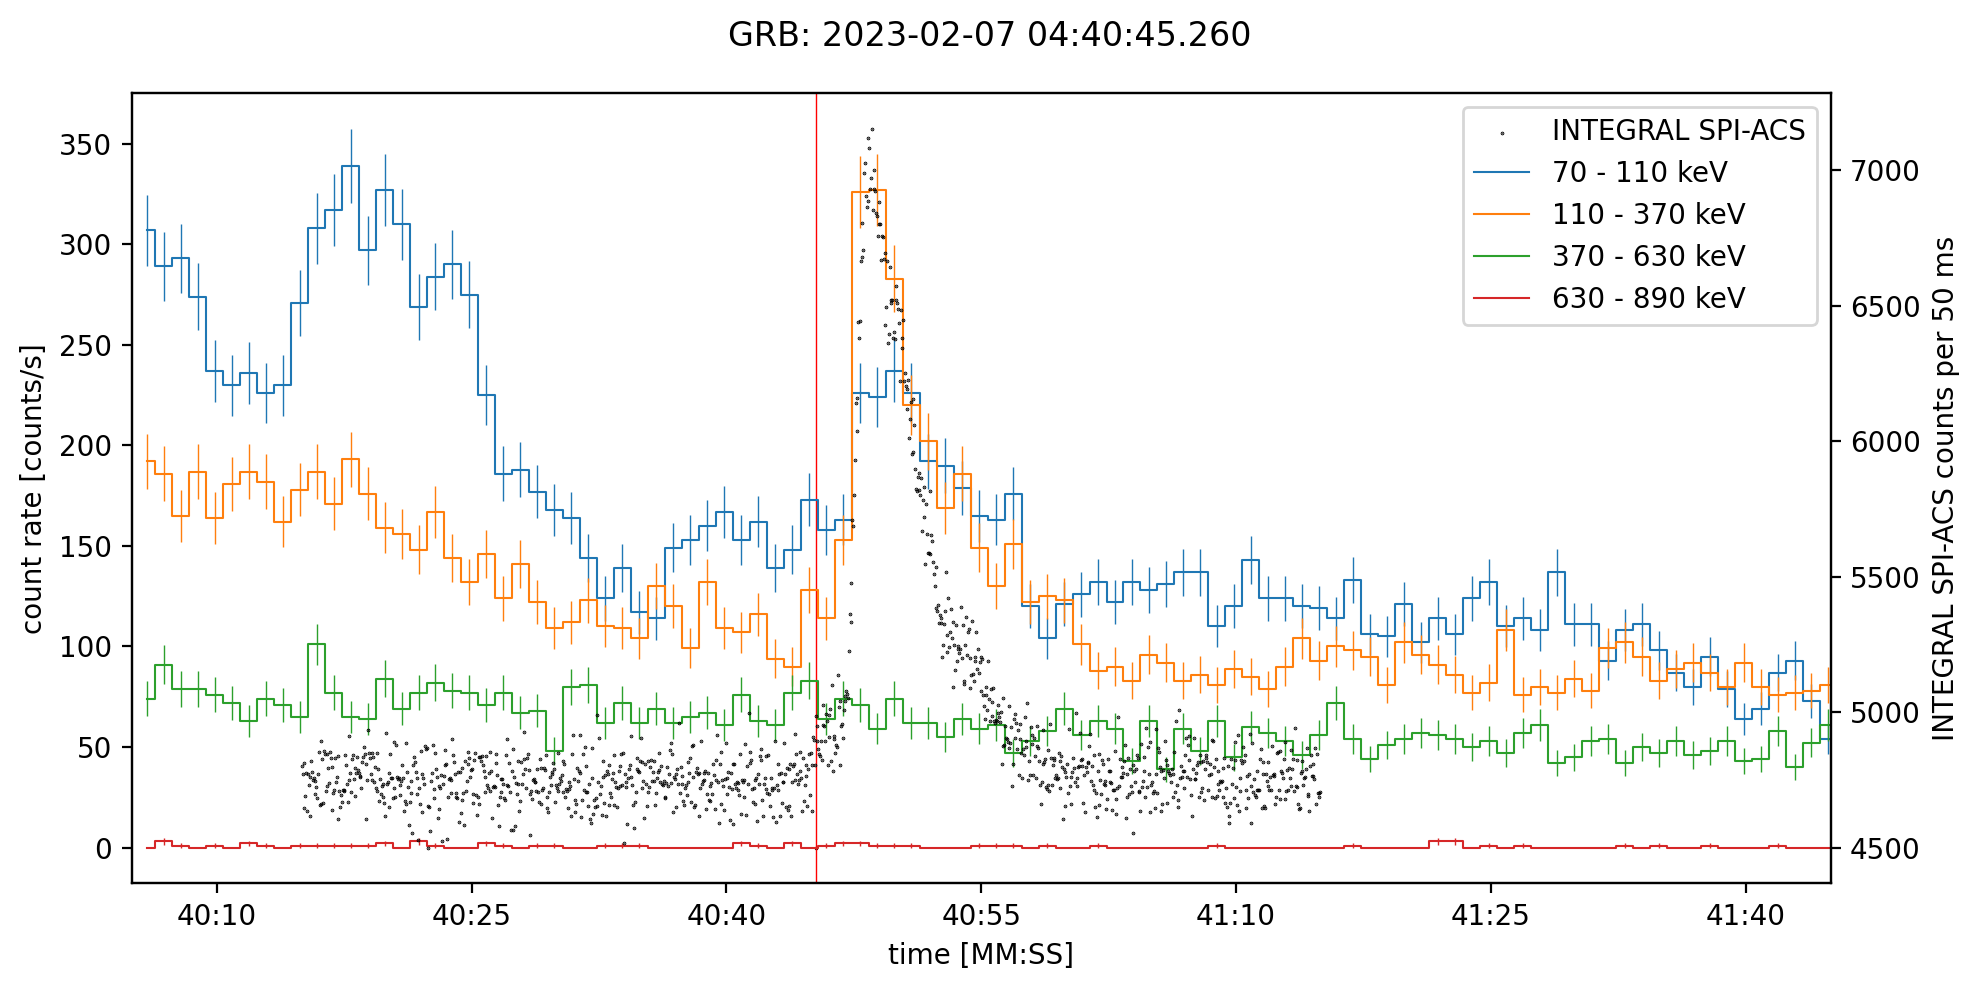

In [53]:
fig, ax = plt.subplots(figsize=(10,5),dpi=200)
fig.suptitle(f'GRB: {trig_time}')
ax.xaxis.set_major_locator(mdates.SecondLocator(interval=15))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%M:%S'))

ax.axvline(pd.to_datetime(trig_time),c='r',lw=0.5)
# ax.scatter(pd.to_datetime(trig_time),0,s=0.1,c='k',label='INTEGRAL SPI-ACS')
# ax2 = ax.twinx()
# ax2.scatter(integral.time,integral.data,s=0.1,c='k',label='INTEGRAL SPI-ACS')
# ax2.set_ylabel('INTEGRAL SPI-ACS counts per 50 ms')

for band in range(ncols):
    E_low = obs.ADC_to_keV(band*256/ncols)
    E_high = obs.ADC_to_keV((band+1)*256/ncols)
    if (E_low != E_high):
        ax.step(obs.data[start_time:end_time].index,obs.data[band][start_time:end_time],where='mid',lw=0.75,c='C'+str(band),label=f'{E_low} - {E_high} keV')
        ax.errorbar(obs.data[start_time:end_time].index,obs.data[band][start_time:end_time],yerr=np.sqrt(obs.data[band][start_time:end_time]),lw=0.5,c='C'+str(band),fmt=' ')


ax.set_xlim(pd.to_datetime(start_time),pd.to_datetime(end_time))
ax.set_xlabel('time [MM:SS]')
ax.set_ylabel('count rate [counts/s]')
ax.legend(loc='upper right')
fig.tight_layout()
fig.show()


In [5]:
np.arange(5,14,1),np.linspace(5,14,9)

(array([ 5,  6,  7,  8,  9, 10, 11, 12, 13]),
 array([ 5.   ,  6.125,  7.25 ,  8.375,  9.5  , 10.625, 11.75 , 12.875,
        14.   ]))